# Task 1: Statevector simulation of quantum circuits

## Question 1 and 2

The `task_1` module contains the functions for the circuit simulation.

- `circuit.py` generates random quantum circuits based on the X, H and CX gates. The target of these gates is also chosen randomly.
- `naive.py` contains the implementation of the naive simulation method.
  - Gates are applied through classic matrix multiplication.
  - This is inefficient, as we've to build a (2^n x 2^n) matrix for each gate.
- `tensor.py` contains the implementation of the tensor simulation method.
  - We use `np.einsum()` to apply the gates more efficiently.

`task_1_data.ipynb` generates ten random quantum circuits for several number of qubits.

- Both methods are then used to simulate the circuit.
- The results are put into a CSV file.

In [1]:
import csv

import matplotlib.pyplot as plt
import numpy as np

In [2]:
naive_raw: dict[int, list[float]] = {}
tensor_raw: dict[int, list[float]] = {}

with open('task_1_data.csv', newline='') as f:
    reader = csv.reader(f)

    for row in reader:
        if row[0] == 'naive':
            naive_raw.setdefault(int(row[1]), []).append(float(row[3]))
        elif row[0] == 'tensor':
            tensor_raw.setdefault(int(row[1]), []).append(float(row[3]))


naive = {
    n: np.mean(naive_raw[n]).item()
    for n in naive_raw
}
tensor = {
    n: np.mean(tensor_raw[n]).item()
    for n in tensor_raw
}

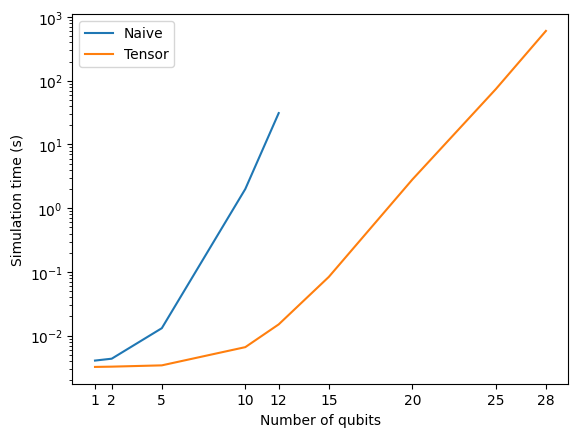

In [3]:
plt.plot(naive.keys(), naive.values(), label='Naive')
plt.plot(tensor.keys(), tensor.values(), label='Tensor')
plt.xlabel('Number of qubits')
plt.xticks(list(tensor))
plt.ylabel('Simulation time (s)')
plt.yscale('log')
plt.legend()
plt.show()

- For both methods, the simulation time increases exponentially with the number of qubits.
- The naive method was limited by the available RAM (it can't simulate more than 12 qubits).
- The tensor method has a lowest prefactor both in time and space. It can simulate more qubits (around 30).

## Bonus questions

> How would you sample from the final states in the statevector or tensor representations?

1. Compute the probability vector `p`.
  - In general, for a vector $\ket{\psi}$, it's equal to $\langle \psi | \psi \rangle$.
  - If `psi` is the `np.ndarray` representing the statevector, `p = np.abs(psi)**2`.
  - If `psi` is a tensor, we use `np.flatten()` to convert it into a one-dimensional `np.ndarray`, and use the previous method.
2. Sample from the probability vector.
  - Use `np.choice(bits, p=p)`.
  - `bits = ["000", "001", "010", ...]` (depending on the number of qubits). This follows the convention where the first qubit is the rightmost.
  - Such a list can be generated with `np.binary_repr()`.

> How about computing exact expectation values in the form $ \bra{\psi}~\text{Op}~\ket{\psi}$?

- $\text{Op}~\ket{\psi}$ is a matrix multiplication. It yields another vector $\ket{\phi}$.
- We then use `np.vdot()` with $\ket{\psi}$ and $\ket{\phi}$ to obtain the expectation value.